## Initial definition of symbols and states vectors

In [ ]:
import sympy as sp
from sympy import init_printing, pprint, init_session
init_printing()

R, h, T, nu_s0, nu_m0, nu_c0, a_m, a_c, th = sp.symbols('R h T \\nu_{s_0} \\nu_{m_0} \\nu_{c_0} a_m a_c, th')
t = sp.symbols("t", positive=True, real=True)

r_s = sp.Matrix([
    [(R+h)*sp.cos(2 * sp.pi/ T * t + nu_s0)],
    [(R+h)*sp.sin(2 * sp.pi/ T * t + nu_s0)],                   
])

r_m = sp.Matrix([
    [a_m * sp.cos(nu_m0)],
    [a_m * sp.sin(nu_m0)]
])

r_c = sp.Matrix([
    [a_c * sp.cos(nu_c0)],
    [a_c * sp.sin(nu_c0)]
])



The geometry of the problem is therefore defined by:

In [5]:
r_s, r_m, r_c

⎛⎡           ⎛            2⋅π⋅t⎞⎤                                           ⎞
⎜⎢(R + h)⋅cos⎜\nu_{s_0} + ─────⎟⎥                                           ⎟
⎜⎢           ⎝              T  ⎠⎥  ⎡aₘ⋅cos(\nu_{m_0})⎤  ⎡a_c⋅cos(\nu_{c_0})⎤⎟
⎜⎢                              ⎥, ⎢                 ⎥, ⎢                  ⎥⎟
⎜⎢           ⎛            2⋅π⋅t⎞⎥  ⎣aₘ⋅sin(\nu_{m_0})⎦  ⎣a_c⋅sin(\nu_{c_0})⎦⎟
⎜⎢(R + h)⋅sin⎜\nu_{s_0} + ─────⎟⎥                                           ⎟
⎝⎣           ⎝              T  ⎠⎦                                           ⎠

In [6]:
def sp_dot(a1,a2):
    assert len(a1) == len(a2)
    result=0
    for i in range(len(a1)):
        result+=a1[i] * a2[i]
    return result

def sp_norm(a):
    result=0
    for i in range(len(a)):
        result+=a[i] **2
    return sp.sqrt(result)

### Derivation of solar eclipse equations

In [11]:
R_solar = -r_m

Psi_solar = sp.acos(
    sp_dot(R_solar, r_s)/ sp_norm(R_solar)/ sp_norm(r_s)
)

Psi_solar = sp.simplify(Psi_solar)

a_solar = sp_norm(r_s) * sp.sin(Psi_solar)

a_solar = sp.simplify(a_solar)

d_a_solar = sp.simplify(sp.diff(a_solar, t))

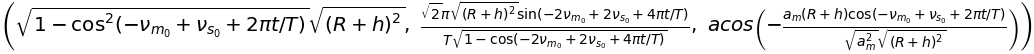

In [12]:
a_solar, d_a_solar, Psi_solar

In [ ]:
ans_solar = sp.solve([sp.Eq(a_solar, R)], t)
ans_solar

### Derivation of communications eclipse equations

In [20]:
R_coms = -r_m + r_c

Psi_coms = sp.acos(sp_dot(R_coms, r_s)/ sp_norm(R_coms)/ sp_norm(r_s))

Psi_coms = sp.simplify(Psi_coms)

a_coms = sp_norm(r_s) * sp.sin(Psi_coms)

a_coms = sp.simplify(a_coms)

d_a_coms = sp.simplify(sp.diff(a_coms, t))

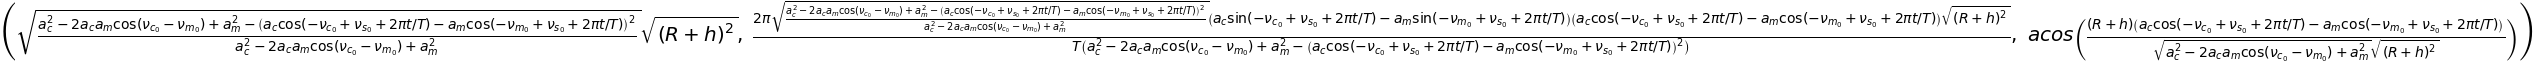

In [21]:
a_coms, d_a_coms, Psi_coms

Find solutions for $t$ that satsify $a_{coms}=R$

In [22]:
ans_coms = sp.solve([sp.Eq(a_coms, R)], t)
ans_coms

KeyboardInterrupt: 

In [36]:
import matplotlib.pyplot as plt
import numpy as np
_t = np.linspace(0,1, 100)
plt.plot(_t, np.arccos(-10 * 0.1 * np.cos(_t * 2 * np.pi) / 10 / 0.1))
plt.show()

# reduce_inequalities([Psi >= sp.pi/2, a<=R], T)
# 

<Figure size 640x480 with 1 Axes>

### Derivation of star sensor equation
